In [ ]:
!pip install tensorflow==2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 927.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 7.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninst

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
# representation of model layers
from keras.utils.vis_utils import plot_model

In [ ]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024),
         tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

In [ ]:
feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

In [ ]:
from google.colab import drive


train = '/content/drive/MyDrive/nsl-kdd/KDDTRA~1.TXT' # Replace with your file path
test = '/content/drive/MyDrive/nsl-kdd/KDDTest+.txt'  # Replace with your file path
test21 = '/content/drive/MyDrive/nsl-kdd/KDDTRA~2.TXT' # Replace with your file path


train_data=pd.read_csv(train, names=feature)
#the train_data file is saven in the current session RAM. It will be lost if you restar runtime.

In [ ]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
# remove attribute 'difficulty_level'
train_data.drop(['difficulty'],axis=1,inplace=True)
train_data.shape

(125973, 42)

In [ ]:
# number of attack labels
train_data['label'].value_counts()

,count
label,
normal,67343
neptune,41214
satan,3633
ipsweep,3599
portsweep,2931
smurf,2646
nmap,1493
back,956
teardrop,892


In [ ]:
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [ ]:
change_label(train_data)

In [ ]:
train_data = train_data[0:10000]

In [ ]:
# distribution of attack classes
train_data.label.value_counts()

,count
label,
normal,5292
Dos,3716
Probe,907
R2L,81
U2R,4


In [ ]:
# creating a dataframe with multi-class labels (Dos,Probe,R2L,U2R,normal)
multi_data = train_data.copy()
multi_label = pd.DataFrame(multi_data.label)

In [ ]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def standardization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

numeric_col = multi_data.select_dtypes(include='number').columns
data = standardization(multi_data,numeric_col)

In [ ]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le2 = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le2.fit_transform)
multi_data['intrusion'] = enc_label
#y_mul = multi_data['intrusion']
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,intrusion
0,-0.114,tcp,ftp_data,SF,-0.012415,-0.038881,0.0,-0.096529,-0.010001,-0.090616,...,-0.762204,-0.286252,0.068685,-0.285355,-0.649655,-0.635631,-0.220111,-0.373724,normal,4
1,-0.114,udp,other,SF,-0.012505,-0.038881,0.0,-0.096529,-0.010001,-0.090616,...,-1.140767,2.806543,2.364982,-0.285355,-0.649655,-0.635631,-0.384329,-0.373724,normal,4
2,-0.114,tcp,private,S0,-0.012544,-0.038881,0.0,-0.096529,-0.010001,-0.090616,...,-0.918083,-0.177733,-0.481132,-0.285355,1.582292,1.592840,-0.384329,-0.373724,Dos,0
3,-0.114,tcp,http,SF,-0.012483,0.037581,0.0,-0.096529,-0.010001,-0.090616,...,1.086076,-0.449030,-0.384106,0.079479,-0.582697,-0.613347,-0.384329,-0.342206,normal,4
4,-0.114,tcp,http,SF,-0.012491,-0.034942,0.0,-0.096529,-0.010001,-0.090616,...,1.086076,-0.449030,-0.481132,-0.285355,-0.649655,-0.635631,-0.384329,-0.373724,normal,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.114,tcp,uucp_path,S0,-0.012544,-0.038881,0.0,-0.096529,-0.010001,-0.090616,...,-1.096230,-0.123473,-0.481132,-0.285355,1.582292,1.592840,-0.384329,-0.373724,Dos,0
9996,-0.114,tcp,http,SF,-0.012484,-0.035898,0.0,-0.096529,-0.010001,-0.090616,...,1.086076,-0.449030,-0.481132,-0.285355,-0.649655,-0.635631,-0.384329,-0.373724,normal,4
9997,-0.114,udp,domain_u,SF,-0.012532,-0.037699,0.0,-0.096529,-0.010001,-0.090616,...,1.063807,-0.394771,-0.481132,-0.285355,-0.649655,-0.635631,-0.384329,-0.373724,normal,4
9998,-0.114,tcp,private,REJ,-0.012544,-0.038881,0.0,-0.096529,-0.010001,-0.090616,...,-1.073962,-0.069213,-0.481132,-0.285355,-0.649655,-0.635631,2.900026,2.778016,Dos,0


In [ ]:
multi_data.drop(labels= [ 'label'], axis=1, inplace=True)
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,-0.114,tcp,ftp_data,SF,-0.012415,-0.038881,0.0,-0.096529,-0.010001,-0.090616,...,-0.797453,-0.762204,-0.286252,0.068685,-0.285355,-0.649655,-0.635631,-0.220111,-0.373724,4
1,-0.114,udp,other,SF,-0.012505,-0.038881,0.0,-0.096529,-0.010001,-0.090616,...,-1.014314,-1.140767,2.806543,2.364982,-0.285355,-0.649655,-0.635631,-0.384329,-0.373724,4
2,-0.114,tcp,private,S0,-0.012544,-0.038881,0.0,-0.096529,-0.010001,-0.090616,...,-0.788417,-0.918083,-0.177733,-0.481132,-0.285355,1.582292,1.592840,-0.384329,-0.373724,0
3,-0.114,tcp,http,SF,-0.012483,0.037581,0.0,-0.096529,-0.010001,-0.090616,...,1.280799,1.086076,-0.449030,-0.384106,0.079479,-0.582697,-0.613347,-0.384329,-0.342206,4
4,-0.114,tcp,http,SF,-0.012491,-0.034942,0.0,-0.096529,-0.010001,-0.090616,...,1.280799,1.086076,-0.449030,-0.481132,-0.285355,-0.649655,-0.635631,-0.384329,-0.373724,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.114,tcp,uucp_path,S0,-0.012544,-0.038881,0.0,-0.096529,-0.010001,-0.090616,...,-0.969135,-1.096230,-0.123473,-0.481132,-0.285355,1.582292,1.592840,-0.384329,-0.373724,0
9996,-0.114,tcp,http,SF,-0.012484,-0.035898,0.0,-0.096529,-0.010001,-0.090616,...,1.280799,1.086076,-0.449030,-0.481132,-0.285355,-0.649655,-0.635631,-0.384329,-0.373724,4
9997,-0.114,udp,domain_u,SF,-0.012532,-0.037699,0.0,-0.096529,-0.010001,-0.090616,...,1.253691,1.063807,-0.394771,-0.481132,-0.285355,-0.649655,-0.635631,-0.384329,-0.373724,4
9998,-0.114,tcp,private,REJ,-0.012544,-0.038881,0.0,-0.096529,-0.010001,-0.090616,...,-0.951063,-1.073962,-0.069213,-0.481132,-0.285355,-0.649655,-0.635631,2.900026,2.778016,0


In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
multi_data['protocol_type']= label_encoder.fit_transform(multi_data['protocol_type'])
multi_data['service']= label_encoder.fit_transform(multi_data['service'])
multi_data['flag']= label_encoder.fit_transform(multi_data['flag'])

multi_data['protocol_type'].unique()
multi_data['service'].unique()
multi_data['flag'].unique()

array([ 9,  5,  1,  4, 10,  2,  6,  3,  8,  7,  0])

In [ ]:
X = data.drop(["intrusion"],axis =1)
y = data["intrusion"]

**Feature Selection**

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
rfecv = RFECV(cv=30, estimator=RandomForestClassifier(random_state=0),
      scoring='accuracy')

rfecv.fit(X,y)

RFECV(cv=30, estimator=RandomForestClassifier(random_state=0),
      scoring='accuracy')

In [ ]:
#to get number of the features
display('Number of features:', rfecv.n_features_)

#to get feature names
list(X.columns[rfecv.support_])

'Number of features:'

31

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'hot',
 'logged_in',
 'num_compromised',
 'num_root',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [ ]:
X_1 = X.columns[rfecv.support_]

In [ ]:
X_new = data[['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'hot',
 'logged_in',
 'num_compromised',
 'num_root',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']]

In [ ]:
rfecv = RFECV(cv=3, estimator=RandomForestClassifier(random_state=0),
      scoring='accuracy')
rfecv.fit(X_new,y)
#to get number of the features
display('Number of features:', rfecv.n_features_)

#to get feature names
list(X_new.columns[rfecv.support_])

'Number of features:'

28

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'hot',
 'logged_in',
 'num_compromised',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [ ]:
df = data[['protocol_type',
             'service',
             'flag',
             'src_bytes',
             'dst_bytes',
             'wrong_fragment',
             'hot',
             'logged_in',
             'num_compromised',
             'count',
             'srv_count',
             'serror_rate',
             'srv_serror_rate',
             'rerror_rate',
             'srv_rerror_rate',
             'same_srv_rate',
             'diff_srv_rate',
             'srv_diff_host_rate',
             'dst_host_count',
             'dst_host_srv_count',
             'dst_host_same_srv_rate',
             'dst_host_diff_srv_rate',
             'dst_host_same_src_port_rate',
             'dst_host_srv_diff_host_rate',
             'dst_host_serror_rate',
             'dst_host_srv_serror_rate',
             'dst_host_rerror_rate',
             'dst_host_srv_rerror_rate',
             'intrusion']]
df.to_csv('kdd_processed.csv')

In [ ]:
from google.colab import files
files.download('kdd_processed.csv')  # download in your PC

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X_2 = data[['protocol_type',
             'service',
             'flag',
             'src_bytes',
             'dst_bytes',
             'wrong_fragment',
             'hot',
             'logged_in',
             'num_compromised',
             'count',
             'srv_count',
             'serror_rate',
             'srv_serror_rate',
             'rerror_rate',
             'srv_rerror_rate',
             'same_srv_rate',
             'diff_srv_rate',
             'srv_diff_host_rate',
             'dst_host_count',
             'dst_host_srv_count',
             'dst_host_same_srv_rate',
             'dst_host_diff_srv_rate',
             'dst_host_same_src_port_rate',
             'dst_host_srv_diff_host_rate',
             'dst_host_serror_rate',
             'dst_host_srv_serror_rate',
             'dst_host_rerror_rate',
             'dst_host_srv_rerror_rate']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size = 0.20, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8000, 28), (8000,), (2000, 28), (2000,))

In [ ]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

**MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(random_state=1, max_iter=300)

# fit the model
mlp.fit(X_train, y_train)

#predicting the target value from the model for the samples

y_pred = mlp.predict(X_test)

mlp_acc = accuracy_score(y_pred, y_test)
mlp_prec = precision_score(y_pred, y_test,average='weighted')
mlp_rec = recall_score(y_pred, y_test,average='weighted')
mlp_f1 = f1_score(y_pred, y_test,average='weighted')


storeResults('MLP',mlp_acc,mlp_prec,mlp_rec,mlp_f1)

**CNN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size = 0.20, random_state = 42)

X_train=X_train.values
X_test=X_test.values

In [ ]:
X_train = X_train.reshape(-1, X_train.shape[1],1)
X_test = X_test.reshape(-1, X_test.shape[1],1)

Y_train=to_categorical(y_train)
Y_test=to_categorical(y_test)

In [ ]:
verbose, epoch, batch_size = 1, 100, 4
activationFunction='relu'

def CNN():

    cnnmodel = Sequential()
    cnnmodel.add(Conv1D(filters=128, kernel_size=2, activation='relu',input_shape=(X_train.shape[1],X_train.shape[2])))
    cnnmodel.add(MaxPooling1D(pool_size=2))
    cnnmodel.add(Dropout(rate=0.2))
    cnnmodel.add(Flatten())
    cnnmodel.add(Dense(5, activation='softmax'))
    cnnmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    cnnmodel.summary()
    return cnnmodel

cnnmodel = CNN()

modelhistory= cnnmodel.fit(X_train, Y_train, epochs=20,steps_per_epoch=2, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 27, 128)           384       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 13, 128)          0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 13, 128)           0         
                                                                 
 flatten_1 (Flatten)         (None, 1664)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 8325      
                                                                 
Total params: 8,709
Trainable params: 8,709
Non-trainable params: 0
____________________________________________________

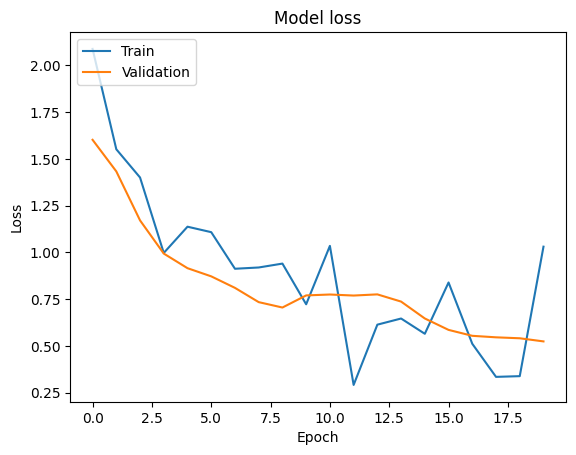

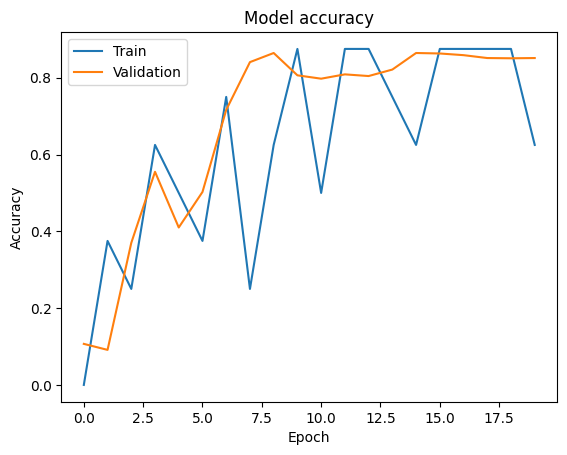

63/63 [==============================] - 0s 1ms/step


In [ ]:
# Plot training & validation loss values
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(modelhistory.history['accuracy'])
plt.plot(modelhistory.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

cnnpredictions = cnnmodel.predict(X_test, verbose=1)
cnn_predict=np.argmax(cnnpredictions,axis=1)

y_pred = cnnmodel.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)

#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

dl_acc = accuracy_score(y_pred, y_test)
dl_prec = precision_score(y_pred, y_test,average='weighted')
dl_rec = recall_score(y_pred, y_test,average='weighted')
dl_f1 = f1_score(y_pred, y_test,average='weighted')

storeResults('CNN',dl_acc,dl_prec,dl_rec,dl_f1)

**GRU**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, GRU, Bidirectional
from keras.layers import Dropout
from keras import regularizers
import tensorflow as tf

# define a function to build the keras model
def create_model(input_shape):
    # create model
    d = 0.25
    model = Sequential()

    model.add(Bidirectional(GRU(32, input_shape=input_shape, activation='relu', return_sequences=True)))
    model.add(Dropout(d))

    model.add(GRU(64, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(d))

    model.add(GRU(128, input_shape=input_shape, activation='relu', return_sequences=True))
    model.add(Dropout(d))

    model.add(GRU(256, input_shape=input_shape, activation='relu', return_sequences=False))
    model.add(Dropout(d))

    model.add(Dense(32,kernel_initializer="uniform",activation='relu'))
    model.add(Dense(1,kernel_initializer="uniform",activation='linear'))

    # compile model
    # Use tf.keras.optimizers.legacy.Adam with decay instead of decay_rate
    adam = tf.keras.optimizers.legacy.Adam(learning_rate=0.001, decay=0.00001)
    #model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy']) # Pass adam here
    #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model(input_shape=(28,1))
#print(model.summary())

In [ ]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=20, batch_size=5, verbose=1)

Epoch 1/20
1600/1600 [==============================] - 136s 82ms/step - loss: 2.6411e-07 - accuracy: 0.3735 - val_loss: 2.6971e-07 - val_accuracy: 0.3640
Epoch 2/20
1600/1600 [==============================] - 126s 79ms/step - loss: 2.6411e-07 - accuracy: 0.3735 - val_loss: 2.6971e-07 - val_accuracy: 0.3640
Epoch 3/20
1600/1600 [==============================] - 126s 79ms/step - loss: 2.6411e-07 - accuracy: 0.3735 - val_loss: 2.6971e-07 - val_accuracy: 0.3640
Epoch 4/20
1600/1600 [==============================] - 121s 76ms/step - loss: 2.6411e-07 - accuracy: 0.3735 - val_loss: 2.6971e-07 - val_accuracy: 0.3640
Epoch 5/20
1600/1600 [==============================] - 121s 76ms/step - loss: 2.6411e-07 - accuracy: 0.3735 - val_loss: 2.6971e-07 - val_accuracy: 0.3640
Epoch 6/20
1600/1600 [==============================] - 124s 78ms/step - loss: 2.6411e-07 - accuracy: 0.3735 - val_loss: 2.6971e-07 - val_accuracy: 0.3640
Epoch 7/20
1600/1600 [==============================] - 123s 77ms/step

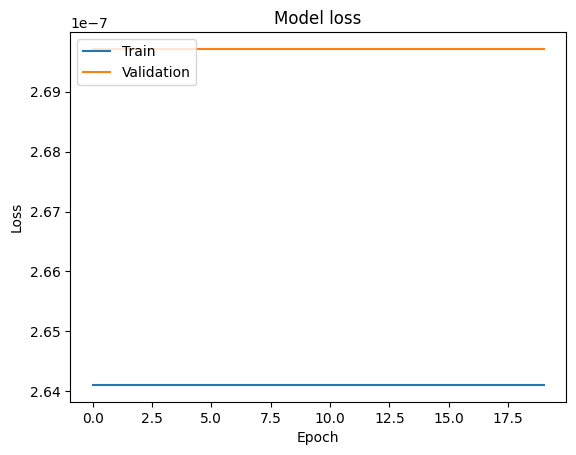

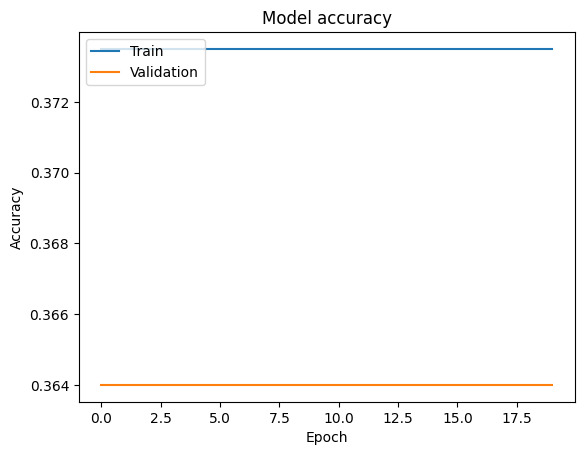

63/63 [==============================] - 3s 27ms/step


In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png', format='png', dpi=1200)
plt.show()


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy.png', format='png', dpi=1200)
plt.show()

y_pred = model.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)


#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

dl_acc = accuracy_score(y_pred, y_test)
dl_prec = precision_score(y_pred, y_test,average='weighted')
dl_rec = recall_score(y_pred, y_test,average='weighted')
dl_f1 = f1_score(y_pred, y_test,average='weighted')

storeResults('GRU',dl_acc,dl_prec,dl_rec,dl_f1)

**CNN + MLP**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size = 0.20, random_state = 42)

import matplotlib.pyplot as plt
n_train = np.array(X_train)
n_test = np.array(X_test)

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
import tensorflow as tf

input_dim = n_train.shape[1]
feature_dim = [25, 20, 15, 10]
print(input_dim)
inputs = Input(shape=(input_dim,))
encoded = inputs
encoded = Dense(feature_dim[0], kernel_initializer="uniform")(encoded)
encoded = Dense(feature_dim[1], kernel_initializer="uniform")(encoded)
encoded = Dense(feature_dim[2], kernel_initializer="uniform")(encoded)
encoded = Dense(feature_dim[3], kernel_initializer="uniform")(encoded)

decoded = encoded
decoded = Dense(feature_dim[2], kernel_initializer="uniform")(decoded)
decoded = Dense(feature_dim[1], kernel_initializer="uniform")(decoded)
decoded = Dense(feature_dim[0], kernel_initializer="uniform")(decoded)
decoded = Dense(input_dim, kernel_initializer="uniform")(decoded)

28


In [ ]:
cnn = Model(inputs, decoded)
cnn.compile(optimizer='adadelta', loss='mse')

cnn.fit(n_train, n_train,
                verbose=0,
                epochs=150,
                batch_size=100,
                shuffle=True,
                validation_data=(n_test, n_test))

predict_vals = cnn.predict(n_train)

250/250 [==============================] - 0s 1ms/step


In [ ]:
from keras.models import Sequential

featuremodel = Sequential()
featuremodel.add(Dense(feature_dim[0], input_shape=(input_dim,), weights=cnn.layers[1].get_weights()))
featuremodel.add(Dense(feature_dim[1], weights=cnn.layers[2].get_weights()))
featuremodel.add(Dense(feature_dim[2], weights=cnn.layers[3].get_weights()))
featuremodel.add(Dense(feature_dim[3], weights=cnn.layers[4].get_weights()))

featuremodel.compile(optimizer='adadelta', loss='mse')

In [ ]:
# classic svm with deep autoencoder
deepmodel = MLPClassifier(random_state=1, max_iter=300)
deepmodel.fit(featuremodel.predict(n_train),y_train)
deepprediction=deepmodel.predict(featuremodel.predict(n_test))
print("Accuracy d-cnn-mlp: %s" % "{0:.3%}".format(metrics.accuracy_score(deepprediction, y_test)))

63/63 [==============================] - 0s 1ms/step
Accuracy d-cnn-mlp: 73.850%


In [ ]:
dl_acc = accuracy_score(deepprediction, y_test)
dl_prec = precision_score(deepprediction, y_test,average='weighted')
dl_rec = recall_score(deepprediction, y_test,average='weighted')
dl_f1 = f1_score(deepprediction, y_test,average='weighted')

storeResults('CNN-MLP',dl_acc,dl_prec,dl_rec,dl_f1)

**COMPARISON**

In [ ]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'Precision': precision,
                        'Recall'   : recall,
                        'F1-Score': f1score,

                      })

In [ ]:
result

,ML Model,Accuracy,Precision,Recall,F1-Score
0,MLP,0.990,0.990,0.990,0.990
1,CNN,0.852,0.944,0.852,0.895
2,GRU,0.364,1.000,0.364,0.534
3,CNN-MLP,0.739,0.771,0.739,0.745


**Saving and downloading model**

In [ ]:
import joblib
filename = 'model_kdd.sav'
joblib.dump(mlp, filename)


['model_kdd.sav']

In [ ]:
from google.colab import files
files.download('model_kdd.sav')  # download in your PC

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**GRAPHS**

In [ ]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

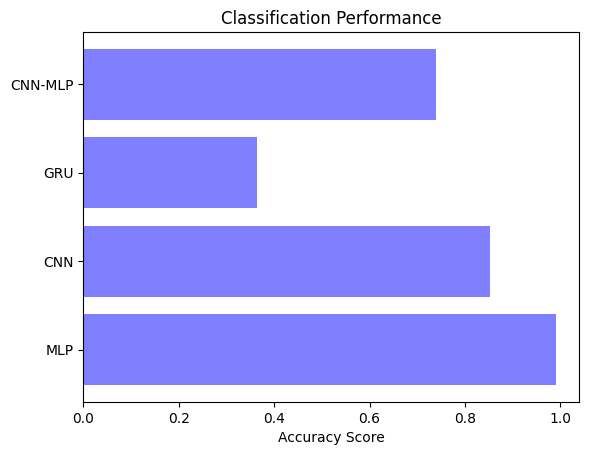

In [ ]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

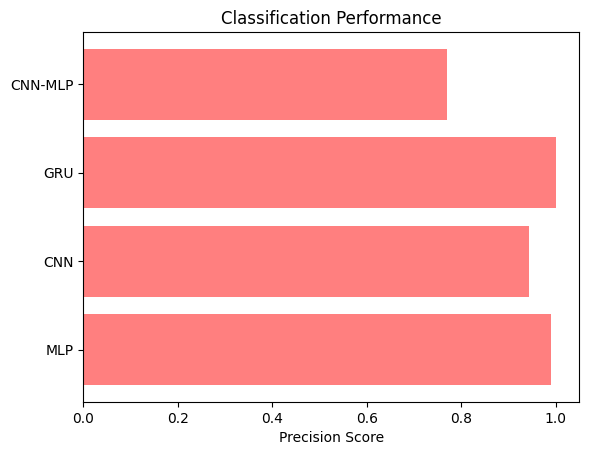

In [ ]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

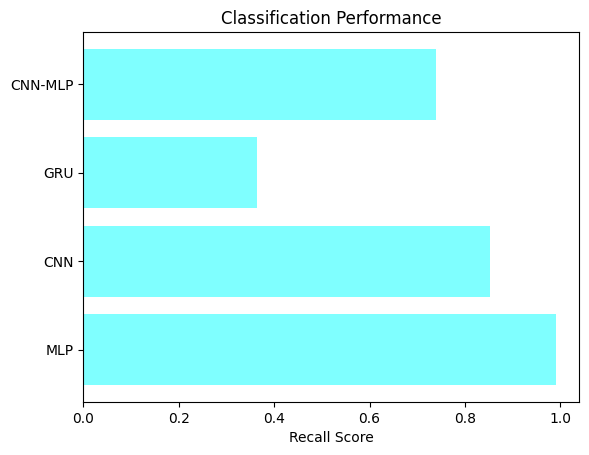

In [ ]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='cyan')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

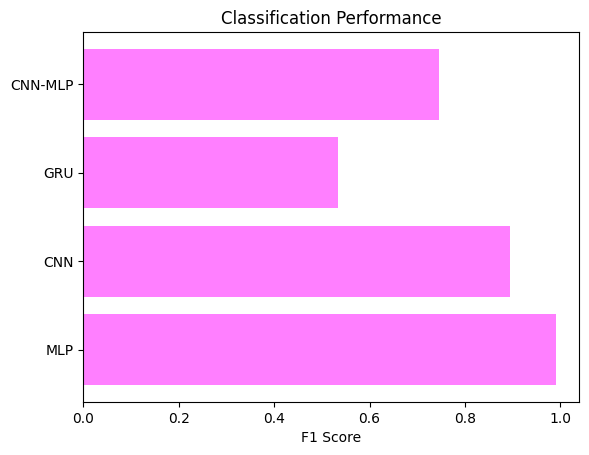

In [ ]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='magenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()